# Project 4 Data Wrangling 

Here i have used **WeRateDogs** Twitter Data to complete this project

This Notebook has following section:

- **Gather**
- **Assess**
- **Clean**
- **Store**
- **Analyse and Visualization**



In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering

In [2]:
tweet_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)

In [4]:
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

tweet_ids = tweet_archive.tweet_id.values

In [12]:
with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error: tweet missing')

Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing


Rate limit reached. Sleeping for: 271


Error: tweet missing
Error: tweet missing


Rate limit reached. Sleeping for: 524


In [5]:
# Converting relevant JSON data to dataframe

tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
                
        tweets_list.append(tweets_dict)

In [6]:
tweets_df = pd.DataFrame(tweets_list)

## Assessing

### Visual Assessing

In [7]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
tweets_df

,favorite_count,retweet_count,tweet_id
0,36784,7845,892420639486877696
1,31670,5805,892177413194625024
2,23859,3844,891815175371796480
3,40105,8003,891689552724799489
4,38305,8652,891327551943041024
5,19270,2883,891087942176911360
6,11235,1899,890971906207338496
7,62017,17509,890729118844600320
8,26510,3976,890609177319665665
9,30351,6813,890240245463175168


## Programmtic Assessing

####  1) Twitter archive data:

In [10]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
tweet_archive.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
628,794926597468000259,NaN,NaN,2016-11-05 15:37:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mack. He's rather h*ckin sleepy. Excep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794926597...,12,10,Mack,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
1408,699072405256409088,NaN,NaN,2016-02-15 03:27:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699072405...,12,10,None,None,None,None,None
1587,686749460672679938,NaN,NaN,2016-01-12 03:20:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686749460...,8,10,None,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
572,801285448605831168,NaN,NaN,2016-11-23 04:45:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",oh h*ck 10/10 https://t.co/bC69RrW559,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801285448...,10,10,None,None,None,None,None
818,770743923962707968,NaN,NaN,2016-08-30 22:04:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a doggo blowing bubbles....,7.392382e+17,4.196984e+09,2016-06-04 23:31:25 +0000,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,None,None,None
284,838921590096166913,NaN,NaN,2017-03-07 01:17:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlo. He's officially the king of snow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/838921590...,13,10,Arlo,None,None,None,None
1431,697516214579523584,NaN,NaN,2016-02-10 20:23:19 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to Pherb. He does parkour. 9/10 http...,NaN,NaN,NaN,https://vine.co/v/i1LriMBmX6W,9,10,Pherb,None,None,None,None
266,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None


In [12]:
sum(tweet_archive['tweet_id'].duplicated())

0

In [13]:
tweet_archive.isnull().values.any()

True

In [14]:
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
tweet_archive.retweeted_status_id.notnull().sum()

181

In [18]:
tweet_archive.in_reply_to_status_id.notnull().sum()

78

In [19]:
tweet_archive[185:190]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,279280991.0,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
187,856282028240666624,NaN,NaN,2017-04-23 23:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Cermet, Paesh, and Morple. They are ab...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856282028...,14,10,Cermet,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


### Assessments for quality:

-  There are 23 rows where the denominator of rating != 10. These entries will have to be removed. these may be geniune tweets. However, these cases only account for a small fraction of the data set and can be set aside for now.

-  columns names needs to be renamed: "timestamp" to "tweet_timestamp", "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name",

- Since retweets and replies will be removed, the column "retweeted_status_timestamp" will be removed as it will no longer provide any useful information.

- Remove column "rating_denominator" once all the values that != 10 have been removed since this will no longer provide any useful information.
- Create a single column for dog type.

### Assessments for tidiness:

-  Multiple rows of where the numerator of rating < 10. This needs to be removed.

-  Multiple rows where numerator of rating > 10. These entries will be assessed and removed if not authentic.

-  There are 181 retweets which need to be removed. This will ensure there are not two rows corresponding to the same tweet, i.e. holding to the definition of tidy data which requires each row to represent a unique entry.

-  There are 78 tweet replies which need to be removed. This will ensure there are not two rows corresponding to the same tweet, i.e. holding to the definition of tidy data which requires each row to represent a unique entry.


#### Image prediction data:

In [20]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_pred.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1212,743210557239623680,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1,golden_retriever,0.930705,True,Chesapeake_Bay_retriever,0.025934,True,Labrador_retriever,0.007535,True
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,0.985649,True,Lhasa,0.007078,True,Pekinese,0.003053,True
928,702684942141153280,https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg,1,golden_retriever,0.514085,True,Chesapeake_Bay_retriever,0.173224,True,Brittany_spaniel,0.118384,True
321,671855973984772097,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,1,chimpanzee,0.636031,False,gorilla,0.098752,False,fountain,0.031755,False
803,691483041324204033,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,1,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True
2003,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke,0.931120,True,Cardigan,0.068698,True,basenji,0.000082,True
1225,744995568523612160,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True
1005,709042156699303936,https://pbs.twimg.com/media/CdcGBB3WwAAGBuU.jpg,1,hotdog,0.826579,False,Rottweiler,0.068179,True,Labrador_retriever,0.049218,True
731,686683045143953408,https://pbs.twimg.com/media/CYeWlh0WAAADhsj.jpg,1,Norwich_terrier,0.100499,True,cocker_spaniel,0.080671,True,golden_retriever,0.079406,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True


In [22]:
image_pred.isnull().values.any()

False

### Assessments for quality:

- Rows where the first (i.e. most confident prediction) has a False value for "p1_dog" (i.e. does not correspond to a type of dog) will be removed.

- The "p1" and "p1_conf" columns will be renamed with more explanatory titles.

- The column "jpg_url" will be removed since url data is already contained in the twitter archive data

- The "p2" and "p3" related columns will be removed as I am only using the most likely prediction ("p1") in my analysis

- After removal of "False" entries, the "p1_dog" column will be removed as it will no longer add any valuable information.

#### 3) Retweet/Favourite count data

In [23]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
tweet_id          2333 non-null object
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [24]:
tweets_df.sample(50)

,favorite_count,retweet_count,tweet_id
176,11656,1833,856526604033556482
1462,2910,747,693231800538148864
50,42735,10775,882268100984492032
461,5132,1065,815990706170904578
94,23143,3683,873580279771926529
2128,344,130,669682090091216896
903,16822,5469,755206499077615616
1825,10208,3385,675798434532581376
2038,855,338,671166423830388736
1888,1183,454,674410613875937281


In [25]:
tweets_df.describe()

,favorite_count,retweet_count
count,2333.000000,2333.000000
mean,7673.470639,2761.732105
std,11911.478275,4673.632787
min,0.000000,1.000000
25%,1333.000000,555.000000
50%,3340.000000,1291.000000
75%,9426.000000,3212.000000
max,158984.000000,79316.000000


In [26]:
tweets_df.isnull().values.any()

False

### Assessments 

#### Quality:

- There are some non-numeric values for the "tweet_id" which needs to be removed.

#### Tidiness:

- After observing all 3 Data's, since all the 3 datasets are of same observational unit. Need to convert the columns are to same type


## Cleaning

#### 1) Twitter archive

In [27]:
tweet_archive_clean = tweet_archive.copy()

### Tidiness Issues

 Let's start with Tidiness, Because i assume that fixing the tidness will reduce most of the quality issues work
 
##### Define
- There are 181 retweets which need to be removed.

#### Code

In [28]:
tweet_archive_clean.drop(tweet_archive_clean[tweet_archive_clean.retweeted_status_id.notnull()].index, inplace = True)

#### Test

In [29]:
tweet_archive_clean.retweeted_status_id.notnull().sum()

0

#### Define
- There are 78 tweet replies which need to be removed. 

#### Code

In [30]:
tweet_archive_clean.drop(tweet_archive_clean[tweet_archive_clean.in_reply_to_status_id.notnull()].index, inplace = True)

#### Test

In [31]:
tweet_archive_clean.in_reply_to_status_id.notnull().sum()

0

#### Define

-  Removing multiple cases of where the denominator of rating != 10.

#### Code

In [32]:
tweet_archive_clean.drop(tweet_archive_clean[tweet_archive_clean.rating_denominator != 10].index, inplace = True)

#### Test

In [33]:
tweet_archive_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

#### Define

- Multiple cases of where the numerator of rating < 10. These entries will be removed.

#### Code

In [34]:
tweet_archive_clean.drop(tweet_archive_clean[tweet_archive_clean.rating_numerator < 10].index, inplace = True)

In [35]:
tweet_archive_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
14       38
1776      1
420       1
75        1
27        1
26        1
Name: rating_numerator, dtype: int64

It seems there are 5 cases where the numerator is exceptionally high (> 14). Now let's investigate it

In [36]:
nums = [1776,420,75,27,26]

for rating in nums:
    print(f'Rating number: {rating}')
    for tweet in range(0,len(tweet_archive.index)):
        if tweet_archive.rating_numerator[tweet] == rating:
            print(tweet_archive.tweet_id[tweet])
            print(tweet_archive.text[tweet])
            print(tweet_archive.expanded_urls[tweet])
            print(tweet_archive.retweeted_status_id[tweet])
            print(tweet_archive.in_reply_to_status_id[tweet])
            print(tweet_archive.source[tweet])
            print(tweet_archive.index[tweet])
        else:
            pass

Rating number: 1776
749981277374128128
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
https://twitter.com/dog_rates/status/749981277374128128/photo/1
nan
nan
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
979
Rating number: 420
855862651834028034
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
nan
nan
8.558615844633518e+17
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
188
670842764863651840
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
https://twitter.com/dog_rates/status/670842764863651840/photo/1
nan
nan
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2074
Rating number: 75
832215909146226688
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
https://twitter.com/dog_rates/status/7867

All seems to be genuine . but we need to fix the values for some rows:

In [37]:
nums = [75,27,26]
correct_vals = [9.75, 11.27, 11.26]
index_list = []

# retrieving indexes
for rating in nums:
    index_list.append(tweet_archive_clean[tweet_archive_clean.rating_numerator == rating].index[0])

# Replacing with correct values
for index,value in zip(index_list,correct_vals):
    tweet_archive_clean.at[index, 'rating_numerator'] = value

#### Test

In [38]:
tweet_archive_clean.rating_numerator.value_counts()

12      486
10      436
11      415
13      287
14       38
1776      1
420       1
9         1
Name: rating_numerator, dtype: int64

### Quality Issues

#### Define
- Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name",

#### Code

In [39]:
new_names = {'timestamp': 'tweet_timestamp', 'text': 'tweet_text',\
             'rating_numerator': 'dog_rating_out_of_ten', 'name': 'dog_name'}


tweet_archive_clean.rename(columns=new_names, inplace=True)

#### Test

In [40]:
list(tweet_archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_timestamp',
 'source',
 'tweet_text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'dog_rating_out_of_ten',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

####  Define

-  Since retweets and replies will be removed, the column "retweeted_status_timestamp" will be removed as it will no longer provide any useful information.

- Remove column "rating_denominator" once all the values that != 10 have been removed since this will no longer provide any useful information.


#### Code

In [41]:
drop_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
             'retweeted_status_user_id','retweeted_status_timestamp','rating_denominator']


tweet_archive_clean.drop(drop_cols, inplace=True, axis=1)

#### Test

In [42]:
list(tweet_archive_clean.columns)

['tweet_id',
 'tweet_timestamp',
 'source',
 'tweet_text',
 'expanded_urls',
 'dog_rating_out_of_ten',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Define
- Create single colums for dog type.

#### Code

In [43]:
tweet_archive_clean = tweet_archive_clean.reset_index()
del tweet_archive_clean['index']
tweet_archive_clean['dog_category'] = 'NaN'

In [45]:
for i in range(0, len(tweet_archive_clean.index)):
    if tweet_archive_clean.loc[i, 'doggo'] == 'doggo':
        tweet_archive_clean.loc[i, 'dog_category'] = 'doggo'
    elif tweet_archive_clean.loc[i, 'floofer'] == 'floofer':
        tweet_archive_clean.loc[i, 'dog_category'] = 'floofer'
    elif tweet_archive_clean.loc[i, 'pupper'] == 'pupper':
        tweet_archive_clean.loc[i, 'dog_category'] = 'pupper'
    elif tweet_archive_clean.loc[i, 'puppo'] == 'puppo':
        tweet_archive_clean.loc[i, 'dog_category'] = 'puppo'
    else:
        tweet_archive_clean.loc[i, 'dog_category'] = 'None'

In [48]:
multi_cat_list = []

for i in range(0, len(tweet_archive_clean.index)):
    if tweet_archive_clean.doggo[i] == 'doggo' and (tweet_archive_clean.floofer[i] == 'floofer' \
                                                   or tweet_archive_clean.pupper[i] == 'pupper'\
                                                   or tweet_archive_clean.puppo[i] == 'puppo'):
        multi_cat_list.append(i)

print(multi_cat_list)
print(len(multi_cat_list))

[153, 160, 354, 411, 441, 531, 556, 677, 813, 852]
10


It Seems there are 10 rows of multiple categories found. Let's check the row
 of entry to correct category to correct values

In [50]:
# Index 153    
tweet_archive_clean.loc[153, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           doggo
floofer          None
pupper           None
puppo           puppo
dog_category    doggo
Name: 153, dtype: object

In [51]:
tweet_archive_clean.tweet_text[153]

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [52]:
# Incorreclty labelled as "doggo", correcting to "puppo"

tweet_archive_clean.loc[153, 'dog_category'] = 'puppo'

In [53]:
# Index 160
tweet_archive_clean.loc[160, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo             doggo
floofer         floofer
pupper             None
puppo              None
dog_category      doggo
Name: 160, dtype: object

In [54]:
tweet_archive_clean.tweet_text[160]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [55]:
# Correcting to "floofer"
tweet_archive_clean.loc[160, 'dog_category'] = 'floofer'

In [56]:
# Index 354
tweet_archive_clean.loc[354, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 354, dtype: object

In [57]:
tweet_archive_clean.tweet_text[354]

'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'

In [58]:
# Correcting to "pupper"
tweet_archive_clean.loc[354, 'dog_category'] = 'pupper'

In [59]:
# Index 411 
tweet_archive_clean.loc[411, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 411, dtype: object

In [60]:
tweet_archive_clean.tweet_text[411]

'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'

In [61]:
# Correcting and adding category to represent that there is multiple dogs/categories present: "multiple"
tweet_archive_clean.loc[411, 'dog_category'] = 'multiple'

In [62]:
# Index 441 
tweet_archive_clean.loc[441, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 441, dtype: object

In [63]:
tweet_archive_clean.tweet_text[441]

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [64]:
# Correcting to "pupper"
tweet_archive_clean.loc[441, 'dog_category'] = 'pupper'

In [65]:
# Index 531
tweet_archive_clean.loc[531, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 531, dtype: object

In [68]:
#This looks to be correct
tweet_archive_clean.tweet_text[531]

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [70]:
# Index 556 
tweet_archive_clean.loc[556, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 556, dtype: object

In [71]:
tweet_archive_clean.tweet_text[556]

'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u'

In [72]:
# Correcting to "multiple"
tweet_archive_clean.loc[556, 'dog_category'] = 'multiple'

In [73]:
# Index 677
tweet_archive_clean.loc[677, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 677, dtype: object

In [74]:
tweet_archive_clean.tweet_text[677]

'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'

In [75]:
# Correcting to "multiple"
tweet_archive_clean.loc[677, 'dog_category'] = 'multiple'

In [76]:
# Index 813
tweet_archive_clean.loc[813, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 813, dtype: object

In [77]:
tweet_archive_clean.tweet_text[813]

'This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC'

In [78]:
# Correcting to "multiple"
tweet_archive_clean.loc[813, 'dog_category'] = 'multiple'

In [79]:
# Index 852
tweet_archive_clean.loc[852, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            doggo
floofer           None
pupper          pupper
puppo             None
dog_category     doggo
Name: 852, dtype: object

In [80]:
tweet_archive_clean.tweet_text[852]

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [81]:
# Correcting to "multiple"
tweet_archive_clean.loc[852, 'dog_category'] = 'multiple'

In [84]:
# dropping original dog category columns

# Test
drop_cats = ['doggo', 'floofer', 'pupper', 'puppo']
tweet_archive_clean.drop(drop_cats, axis=1, inplace=True)
tweet_archive_clean.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None


#### Test

In [85]:
tweet_archive_clean.head()

,tweet_id,tweet_timestamp,source,tweet_text,expanded_urls,dog_rating_out_of_ten,dog_name,dog_category
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None


#### 2) Image prediction

In [88]:
image_pred_clean = image_pred.copy()

### Quaity


#### Define

- Entries where the first (i.e. most confident prediction) has a False value 
   for "p1_dog" (i.e. does not correspond to a type of dog) will be removed. 

#### Code

In [89]:
image_pred_clean.drop(image_pred_clean[image_pred_clean.p1_dog == False].index, inplace=True)

#### Test

In [90]:
image_pred_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

#### Define
- The "p1" and "p1_conf" columns will be renamed with more explanatory titles.

#### Code

In [91]:
new_col_names = {'p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}

image_pred_clean.rename(columns= new_col_names, inplace=True)

#### Test

In [92]:
list(image_pred_clean.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'dog_breed_prediction',
 'prediction_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Define

- The column "jpg_url" will be removed since url data is already contained in the 
  twitter archive data (expanded_urls)

- The "p2" and "p3" related columns will be removed as I am only using the most 
likely prediction ("p1") in my analysis

- After removal of "False" entries, the "p1_dog" column will be removed as it will no 
longer add any valuable information.

#### Code

In [93]:
pred_drop_cols = ['jpg_url', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']

image_pred_clean.drop(pred_drop_cols, inplace=True, axis=1)

#### Test

In [94]:
list(image_pred_clean.columns)

['tweet_id', 'img_num', 'dog_breed_prediction', 'prediction_confidence']

### 3) Retweet/Favourite count data

In [95]:
tweets_df_clean = tweets_df.copy()

### Quality

#### Define
- Finding non-numeric values for "tweet_id"

#### Code

In [96]:
nn_index_list = []

for tweet in range(0, len(tweets_df_clean.tweet_id)):
    if type(tweets_df_clean.tweet_id[tweet]) != int:
        nn_index_list.append(tweet)

In [97]:
print(len(nn_index_list))

272


In [98]:
tweets_df_clean.shape

(2333, 3)

In [99]:
for tweet in nn_index_list:
    tweets_df_clean.drop(tweets_df_clean[tweets_df_clean.index == tweet].index, inplace=True)

#### Test

In [100]:
tweets_df_clean.shape

(2061, 3)

In [101]:
# Reset index
tweets_df_clean = tweets_df_clean.reset_index()
del tweets_df_clean['index']

In [106]:
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,36784,7845,892420639486877696
1,31670,5805,892177413194625024
2,23859,3844,891815175371796480
3,40105,8003,891689552724799489
4,38305,8652,891327551943041024


### TIdiness

#### Define

 Need to convert the columns are to same type
 
#### Code

#### Create a Master DataFrame by merging all 3 DataFrames

In [103]:
# Merging tweet archive & image predication dataframes
master_df_pt1 = pd.merge(tweet_archive_clean, image_pred_clean, on='tweet_id', how='left')
#Changing datytype to int in both master and tweets_df dataframes. FIrst let convert it to int64 with numpy
tweets_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype(np.int64)
master_df_pt1['tweet_id']=master_df_pt1['tweet_id'].astype(np.int64)
#Now let's convert it to int. we are doing this make all the data's in a column to same data type
tweets_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype(int)
master_df_pt1['tweet_id']=master_df_pt1['tweet_id'].astype(int)
#Now Let's merge the all the 3 dataframes
master_df = pd.merge(master_df_pt1, tweets_df_clean,on=['tweet_id'],how='left')

### Storing

#### Saving all the dataframes to .csv file

In [109]:
master_df.to_csv('twitter_archive_master.csv', index=False)
tweet_archive_clean.to_csv('clean_twitter_archive_data.csv', index=False)
image_pred_clean.to_csv('clean_image_prediction_data.csv', index=False)
tweets_df_clean.to_csv('clean_rt_and_fav_data.csv', index=False)

In [110]:
master_df.shape

(1669, 13)

### Analysis & Visualization

I Provided my insights with the Visualization


**Pupper is the Most Common Dog**

In [111]:
master_df.dog_category.value_counts()

None        1376
pupper       184
doggo         71
puppo         23
floofer       10
multiple       5
Name: dog_category, dtype: int64

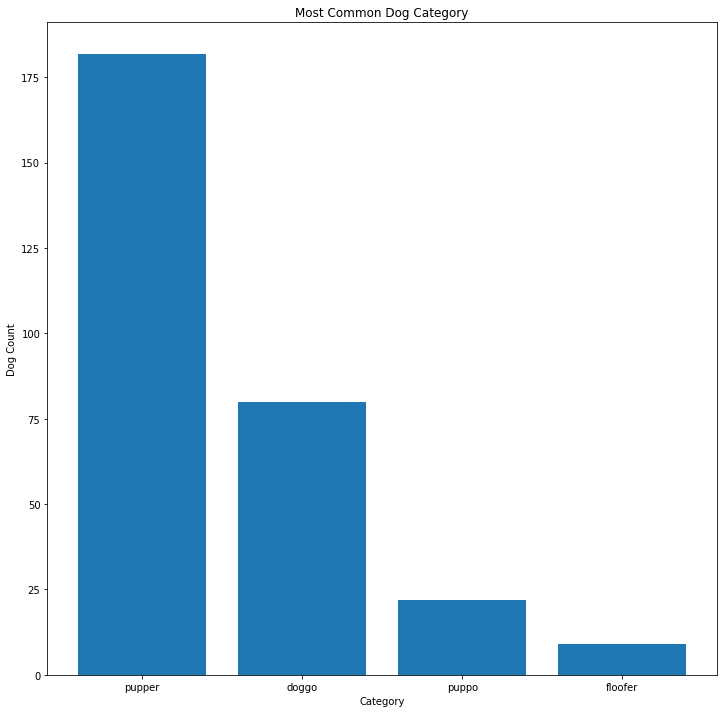

In [112]:
#To avoid None Values, i have created a list of catergory to plot it
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [182, 80, 22, 9]
fig,ax = plt.subplots(figsize = (12,12))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

**Among all other dogs Golden Retriver is most rates dog**

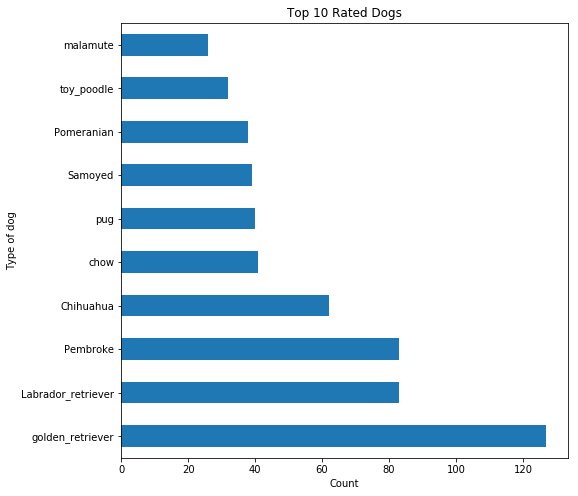

In [113]:
fig,ax = plt.subplots(figsize = (8,8))
master_df.dog_breed_prediction.value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Rated Dogs')
plt.xlabel('Count')
plt.ylabel('Type of dog');

**We can see a positive corellation between Favorite and Retweet counts**

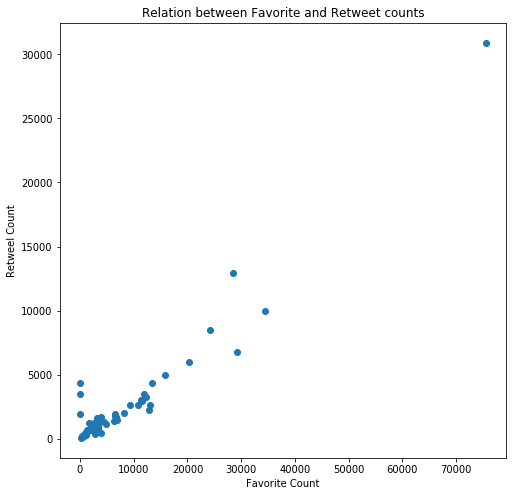

In [114]:
x = master_df['favorite_count']
y = master_df['retweet_count']
plt.subplots(figsize = (8,8))
plt.scatter(x,y)
plt.title("Relation between Favorite and Retweet counts")
plt.xlabel("Favorite Count")
plt.ylabel("Retweel Count");